In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [ ]:
conda install -c conda-forge scanpy

Solving environment: \ 

In [24]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
results_file = '/home/qkrtltm100/FastQ/Alter/adata_seurat_trajectory.h5ad'
sc.settings.set_figure_params(dpi=120, frameon=False, figsize=(6, 6), facecolor='white')  # low dpi (dots per inch) yields small inline figures

In [3]:
adata=sc.read('/home/qkrtltm100/FastQ/Alter/adata_seurat.h5ad')

In [4]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:40)


In [5]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:09:54)


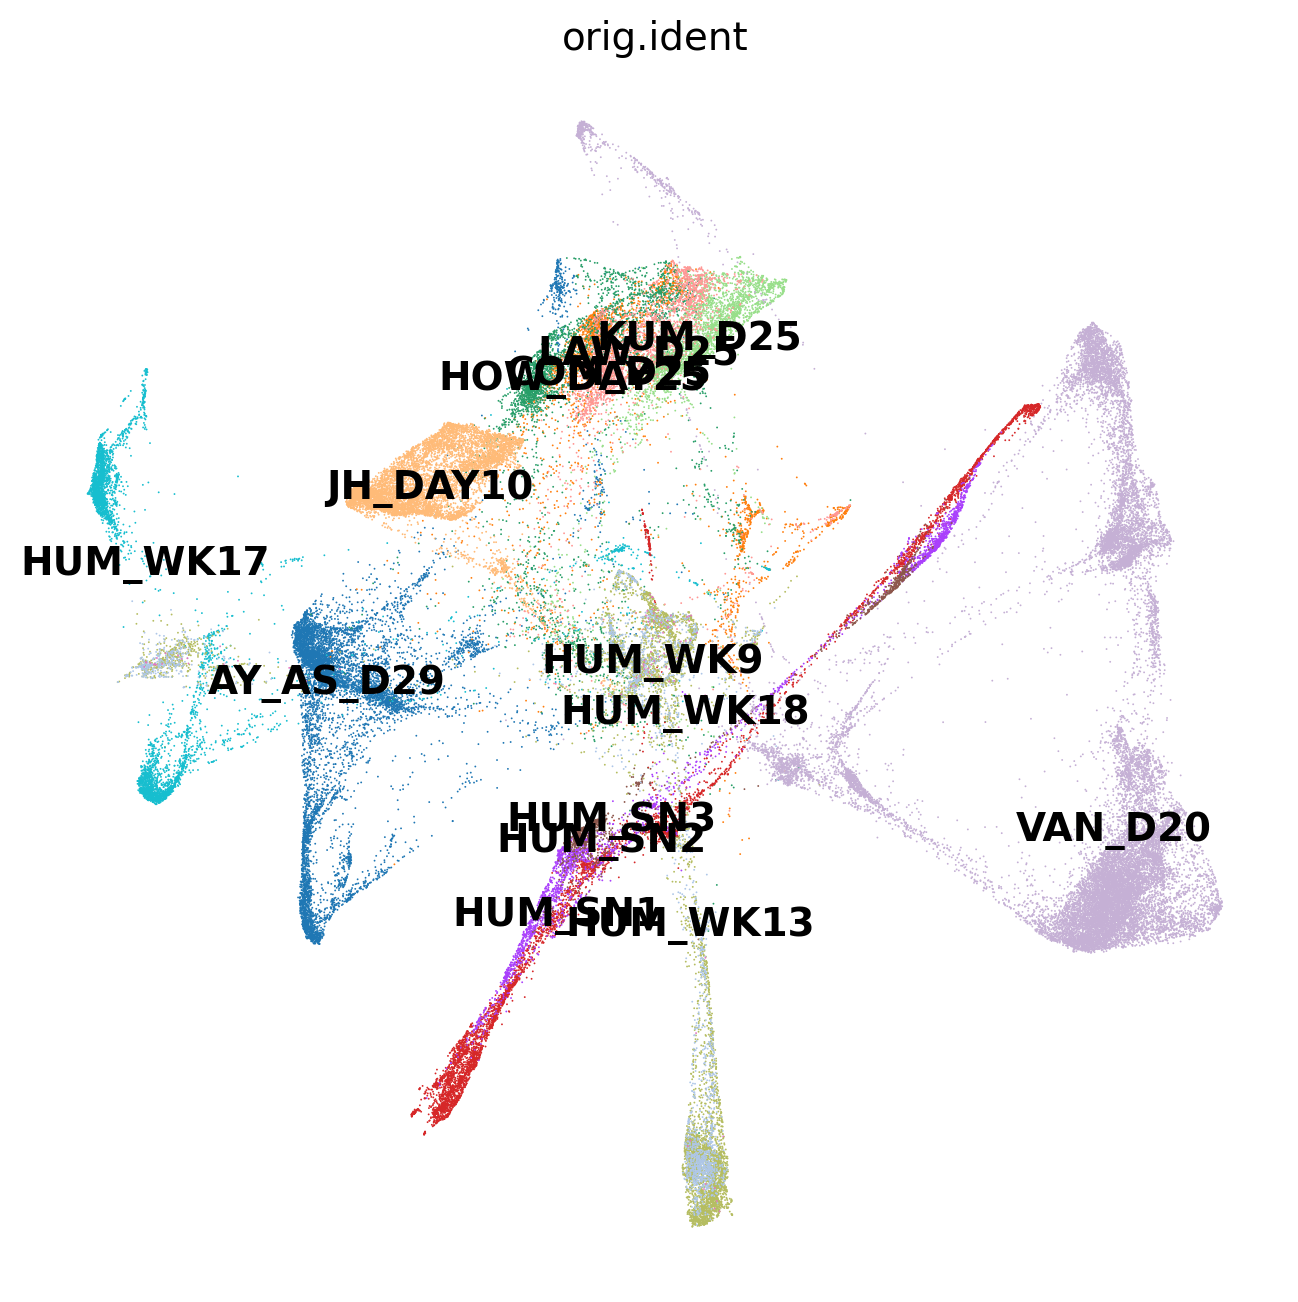

In [6]:
rcParams['figure.figsize'] = 8, 8
sc.pl.draw_graph(adata, color='orig.ident', legend_loc='on data')

In [7]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9999393  0.9998537  0.9997769  0.9996585  0.99942046
     0.999092   0.9990642  0.99894524 0.9988808  0.9985677  0.9983624
     0.99825263 0.9978305  0.9976722 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:06)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [8]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:10:17)


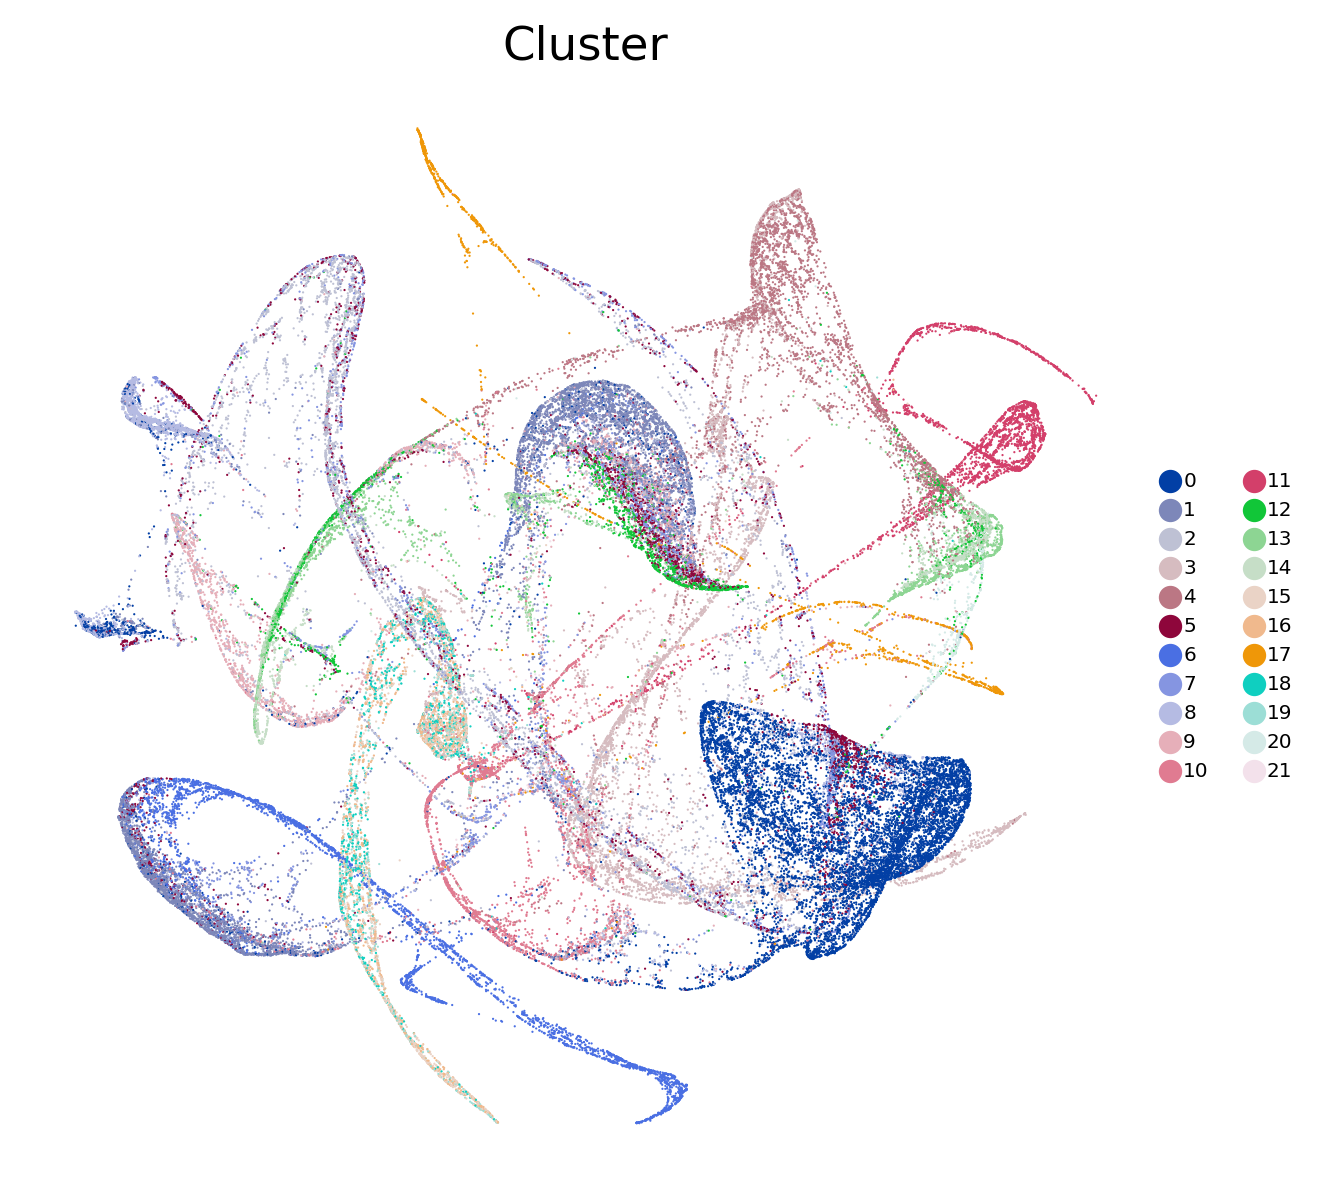

In [25]:
sc.pl.draw_graph(adata, color='seurat_clusters', legend_loc='right margin', legend_fontsize='6', title='Cluster')

In [27]:
sc.tl.paga(adata, groups='orig.ident')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)


--> added 'pos', the PAGA positions (adata.uns['paga'])


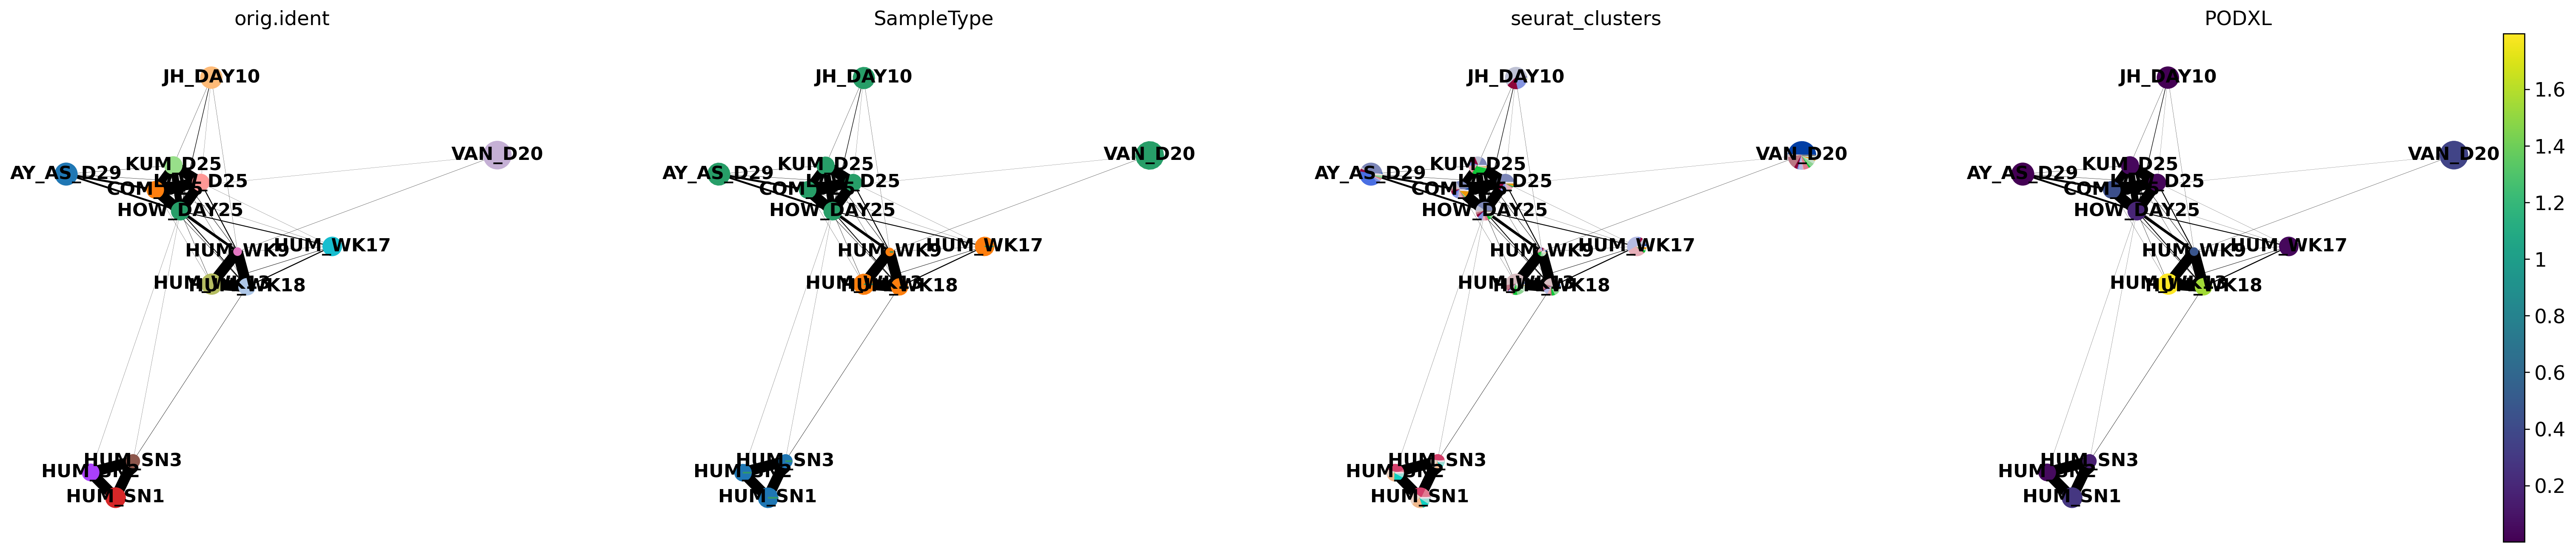

In [29]:
sc.pl.paga(adata, color=['orig.ident', 'SampleType', 'seurat_clusters', 'PODXL'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes:>

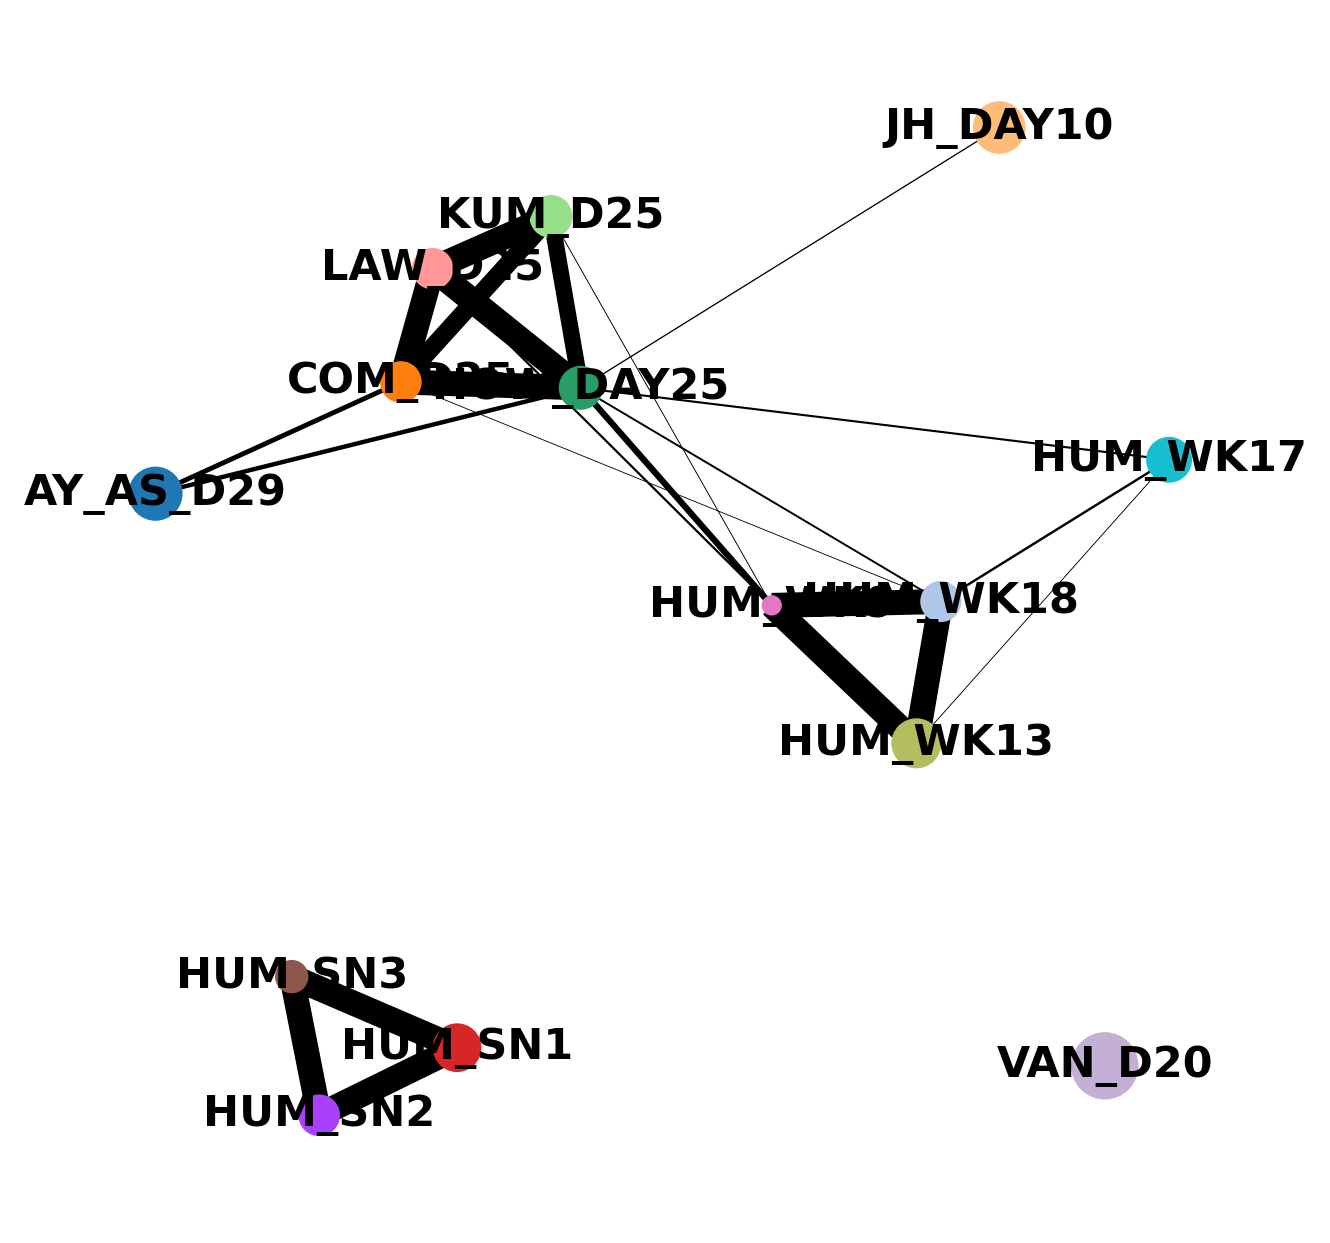

In [30]:
sc.pl.paga(adata, threshold=0.03, show=False)

In [31]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:08:21)


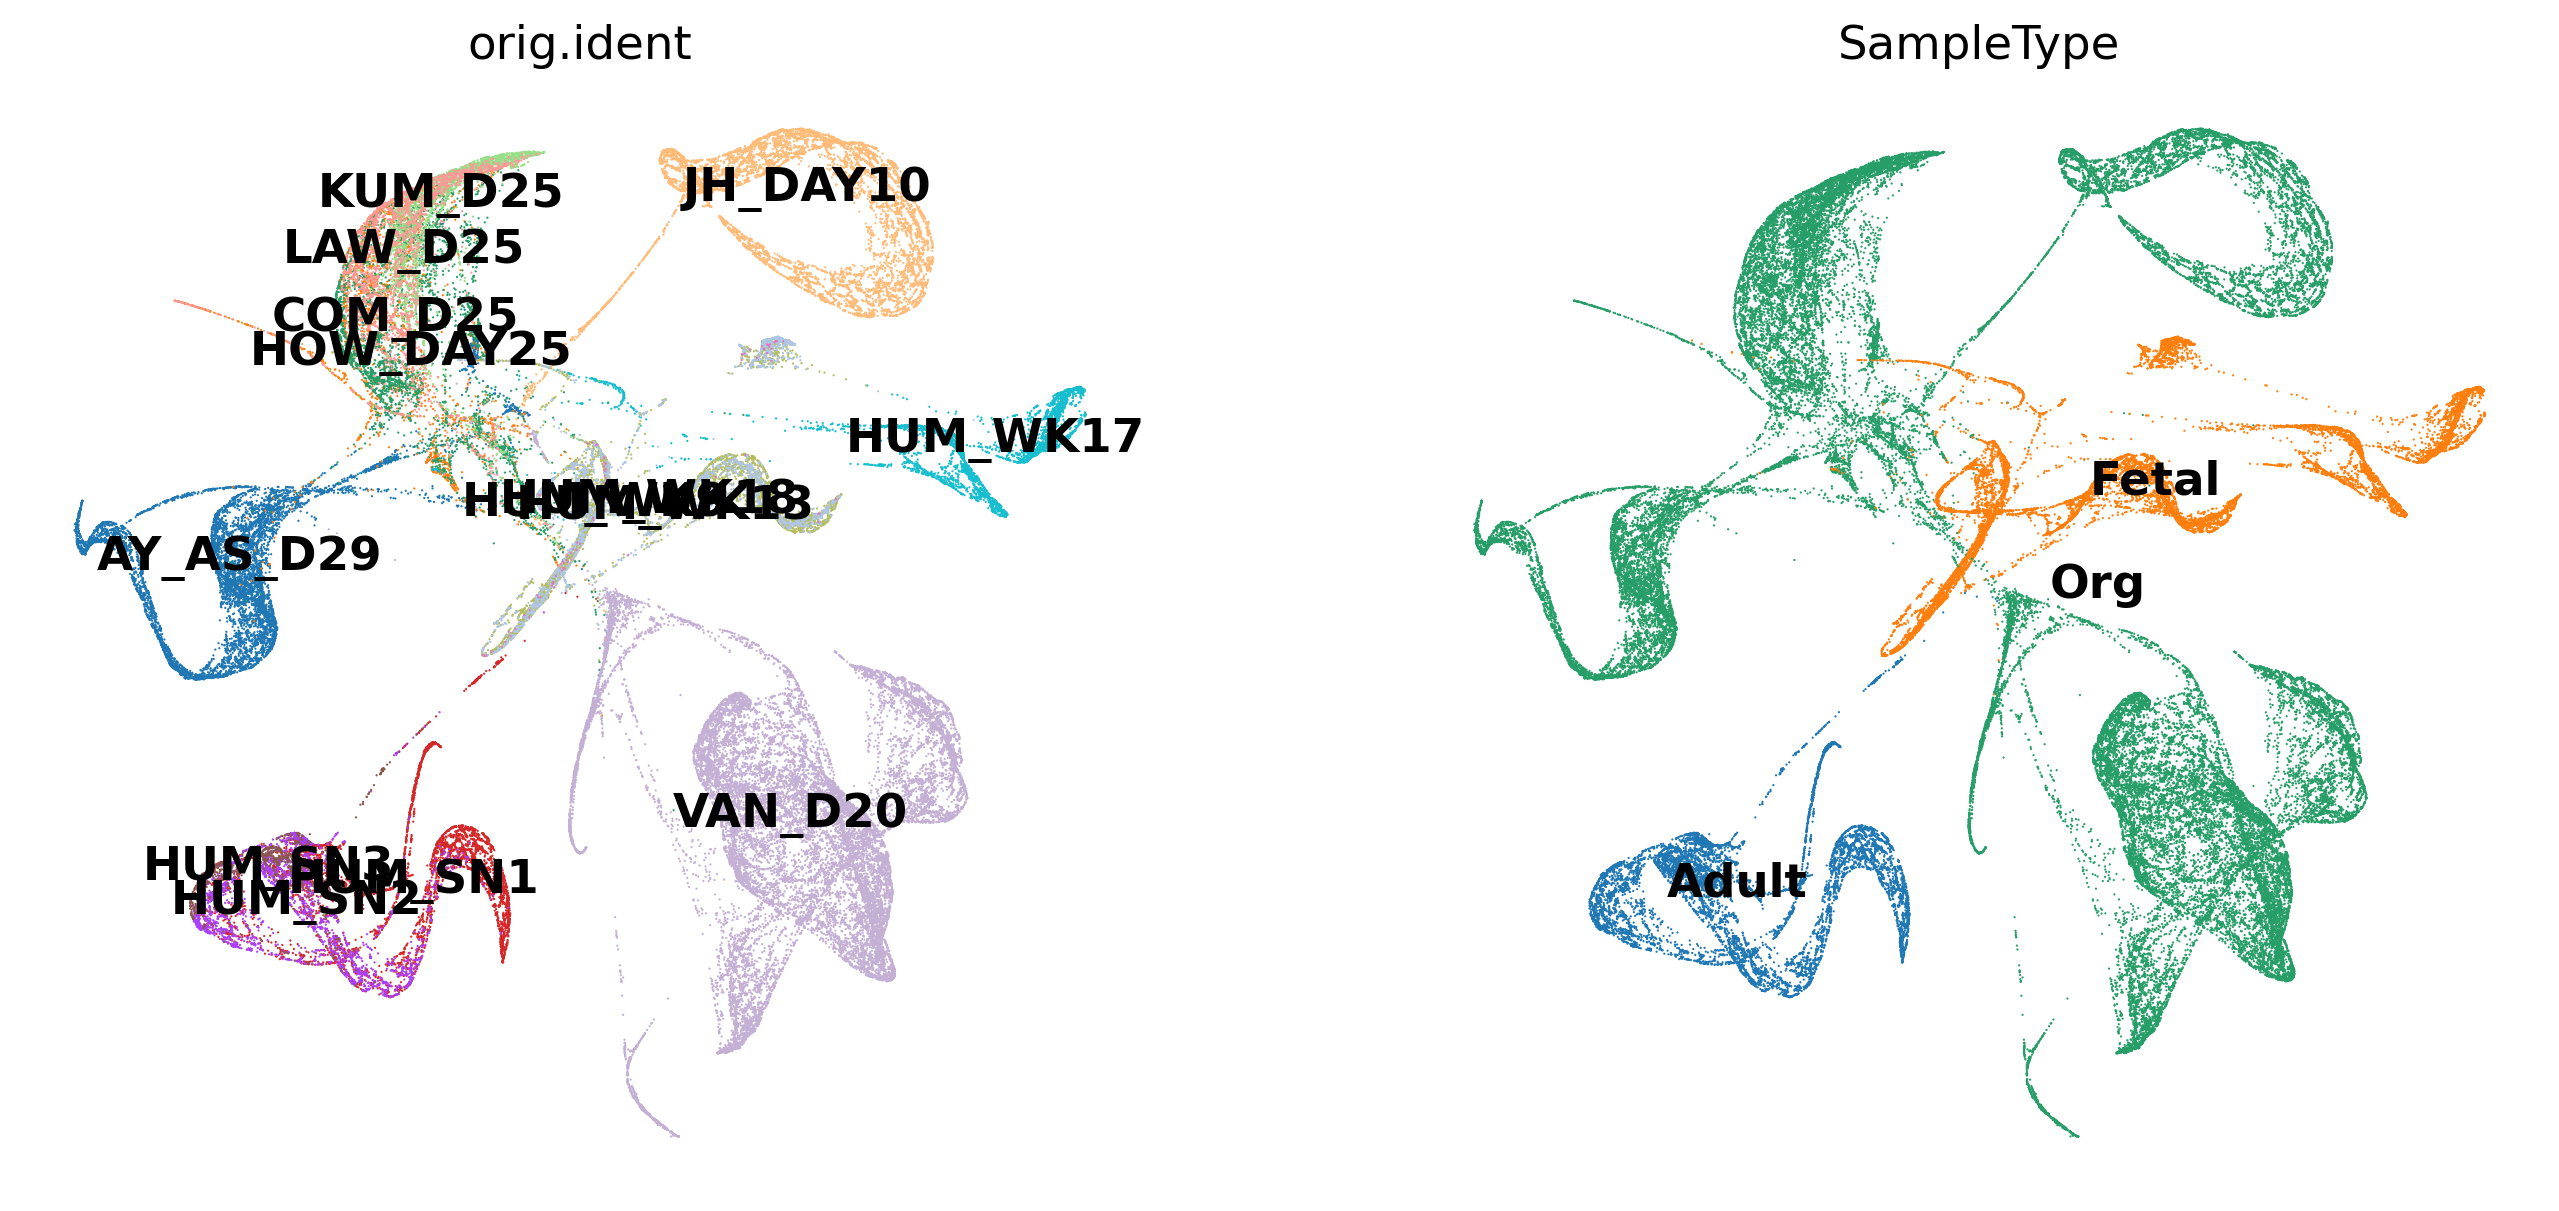

In [32]:
sc.pl.draw_graph(adata, color=['orig.ident', 'SampleType'], legend_loc='on data') #rootcell=7

--> added 'pos', the PAGA positions (adata.uns['paga'])


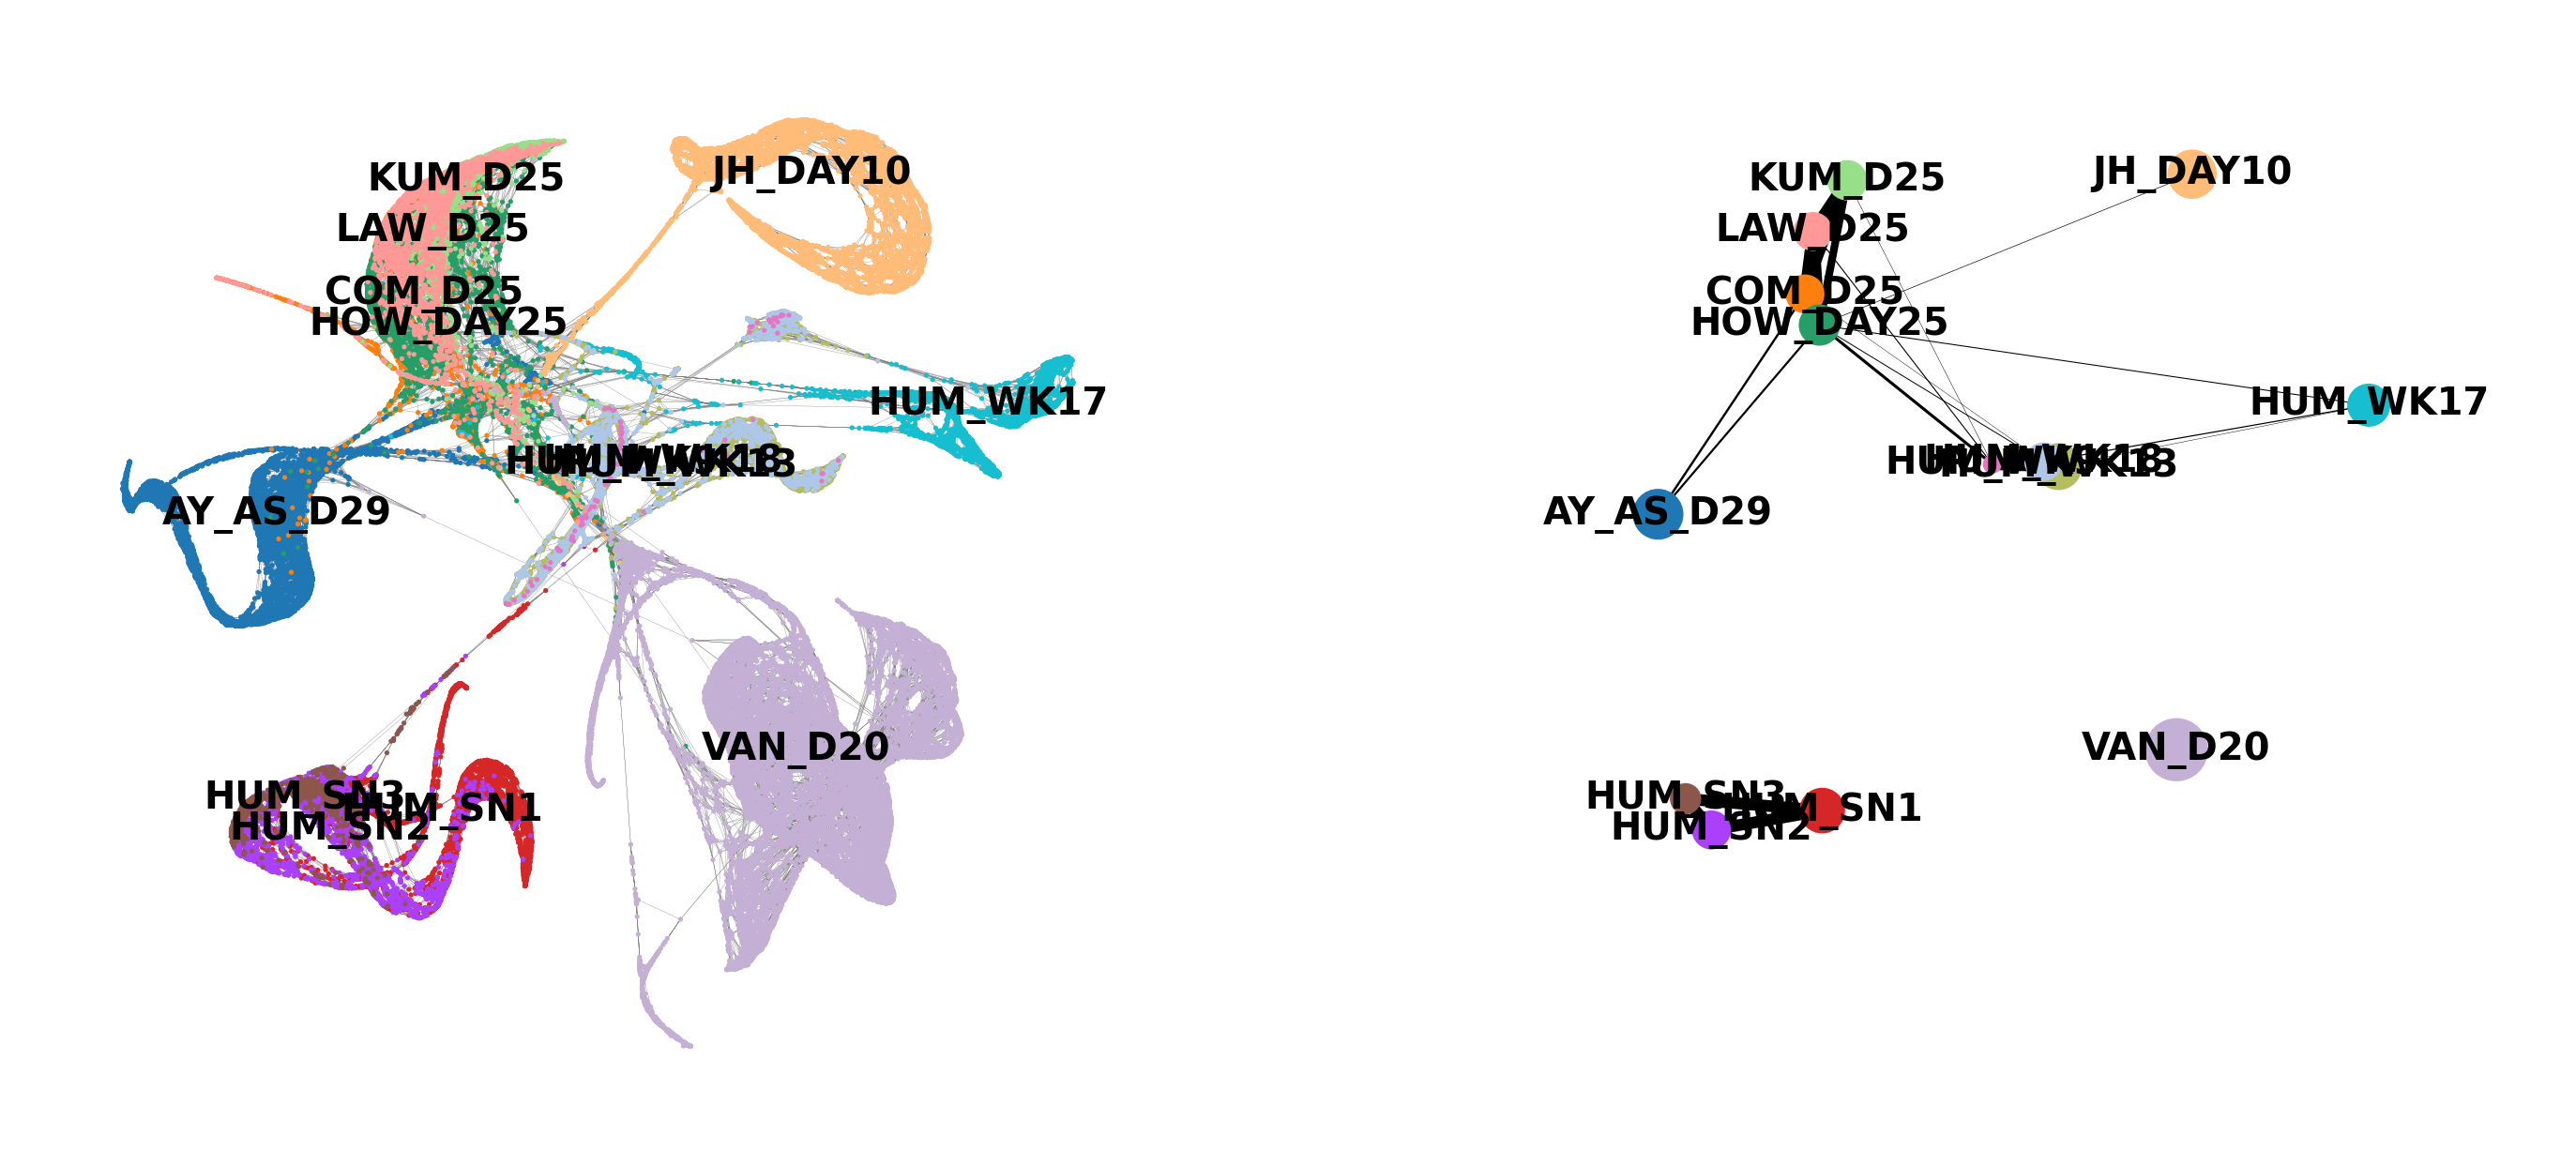

In [33]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [34]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['seurat_clusters']  == '7')[0]

In [35]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


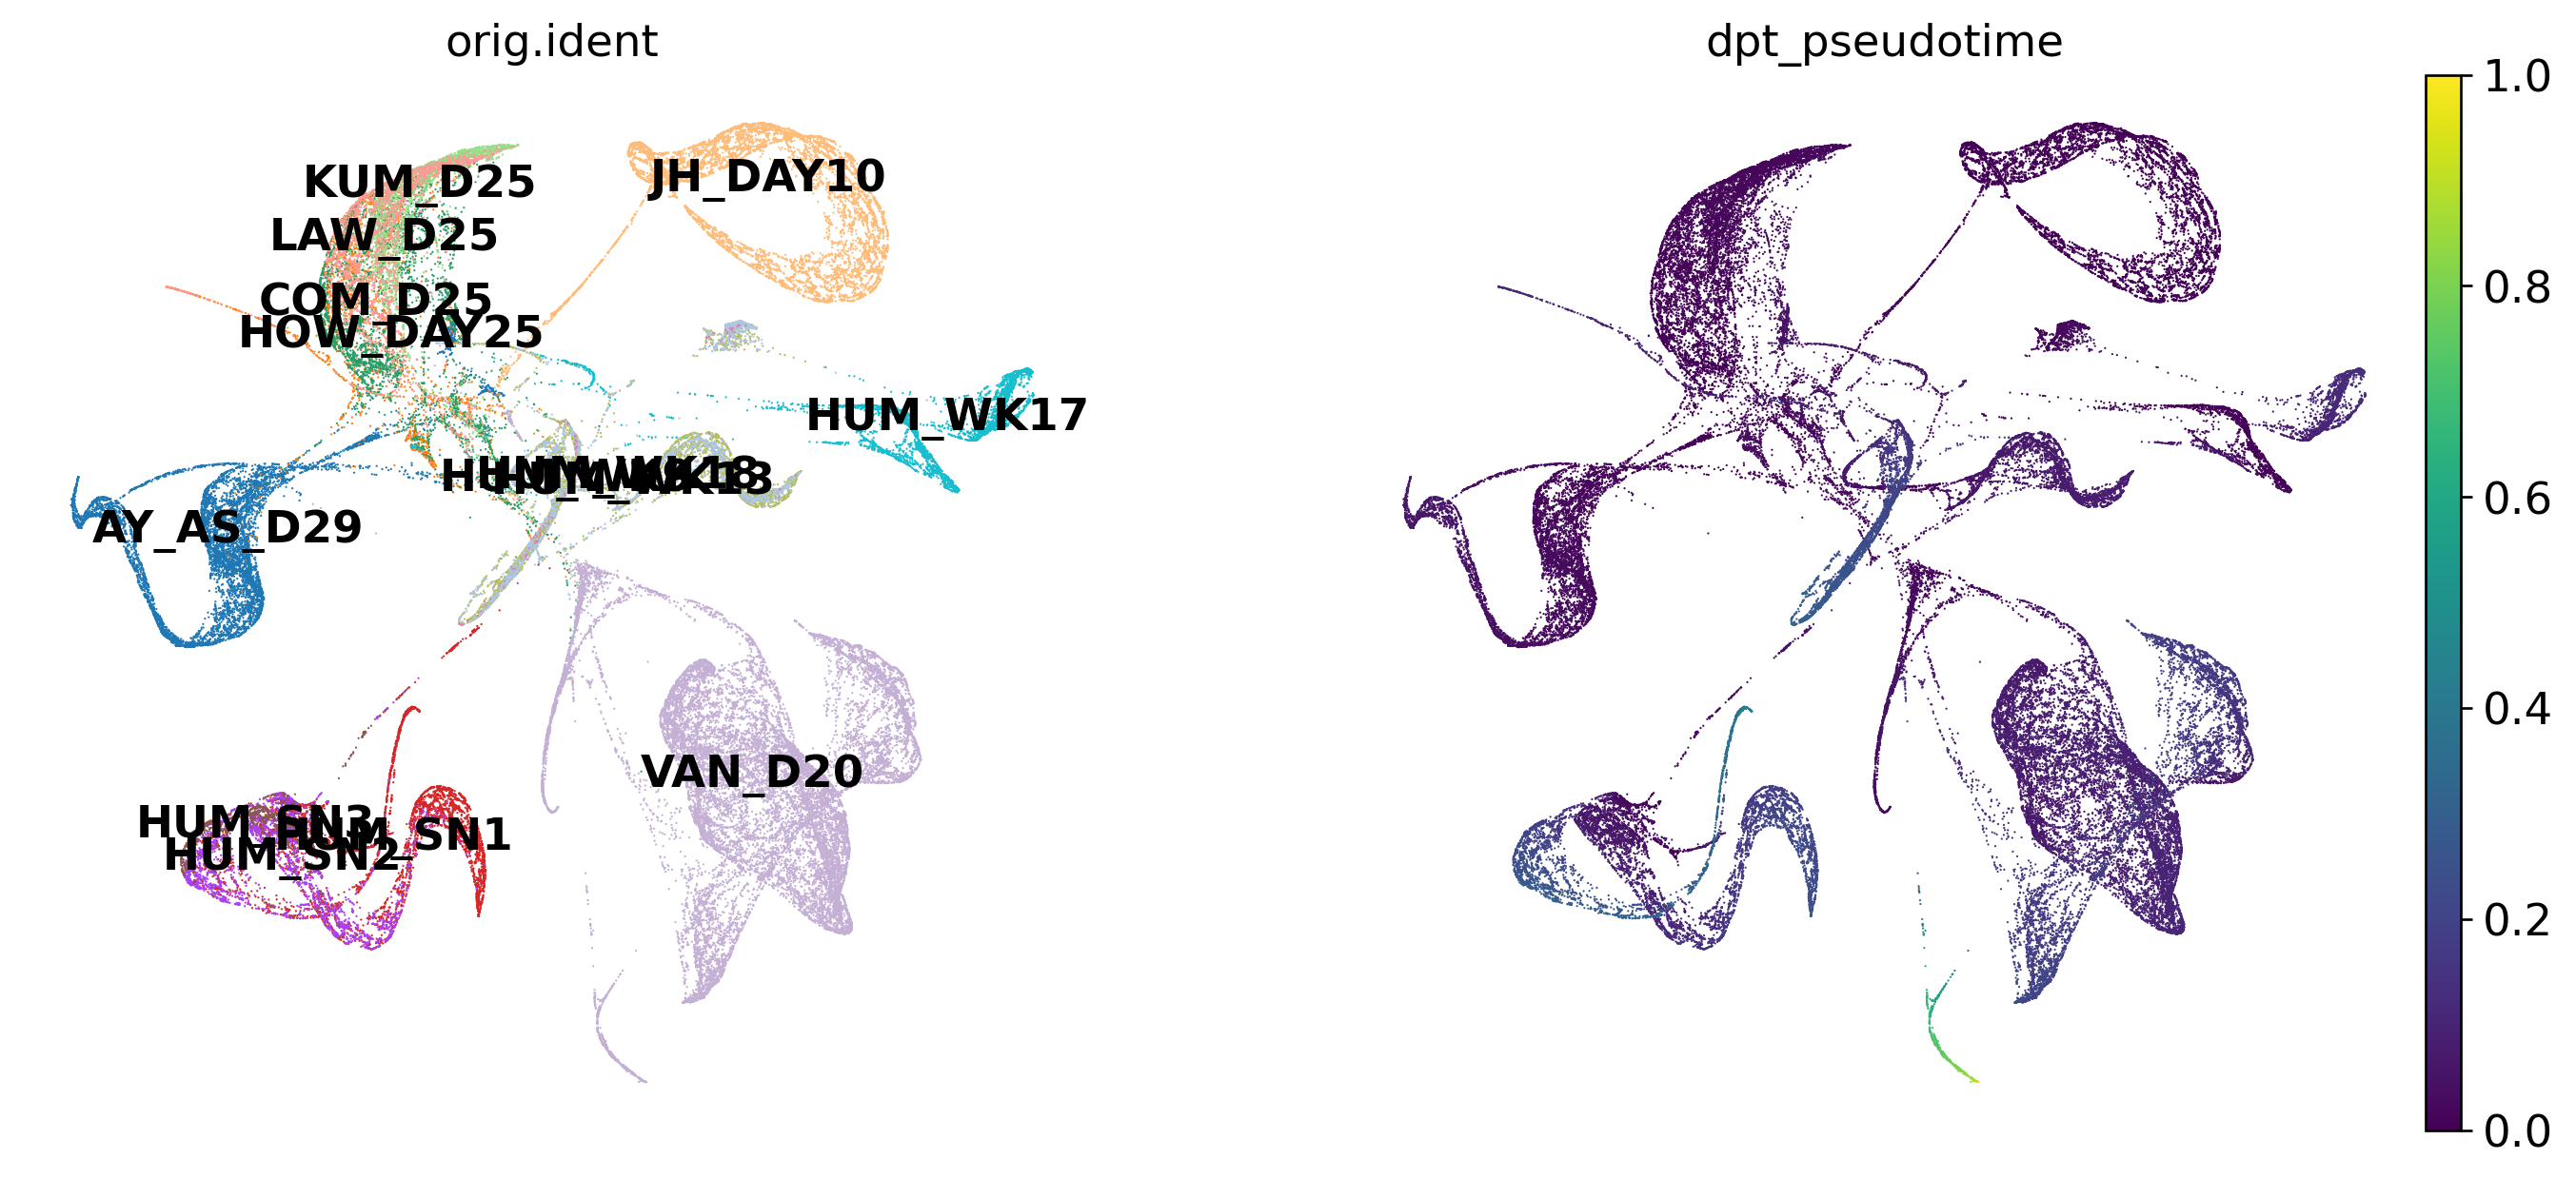

In [36]:
sc.pl.draw_graph(adata, color=['orig.ident', 'dpt_pseudotime'], legend_loc='on data')